In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [5]:
m = 1e-5   
# Mass of the scalar field


def odes(t, y):
    X1, X2 = y
    # Calcolo di H usando la Friedmann equation:
    H = np.sqrt((0.5*X2**2 + 0.5*m**2*X1**2)/3)
    X1dot = X2
    X2dot = -3 * H * X2 - m**2 * X1
    return [X1dot, X2dot]
    
def compute_H(y):
    phi, phidot = y
    return np.sqrt((0.5*phidot**2 + 0.5*m**2*phi**2)/3)



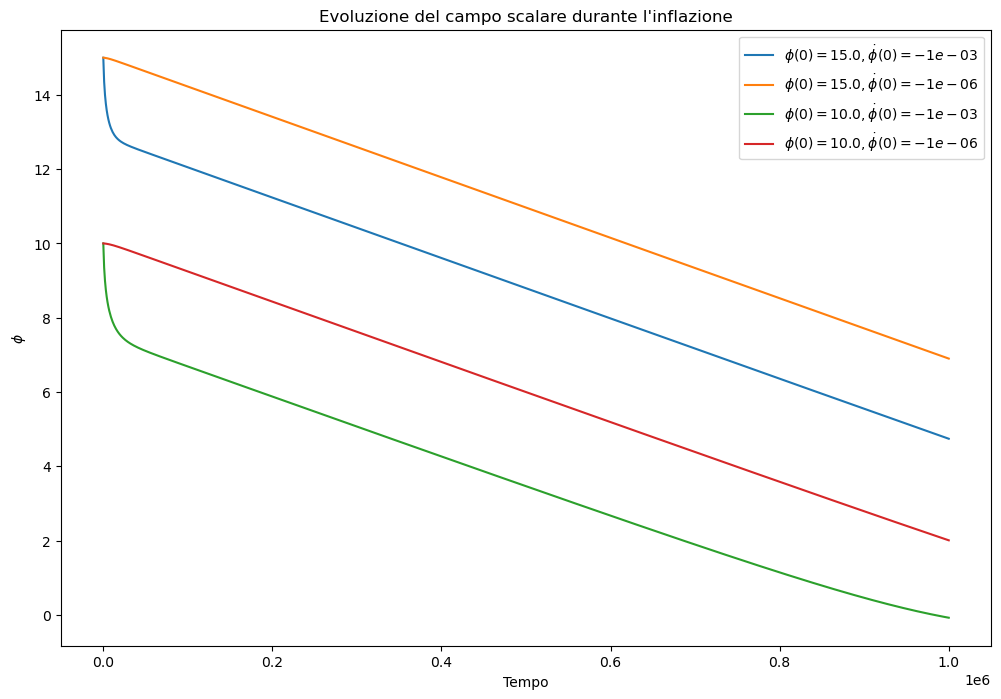

In [14]:
# Definisci gli intervalli temporali (ad esempio, in "unità di tempo" appropriate)
t_span = (0, 1000000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Varia le condizioni iniziali (ad es. phi0 elevato e phi_dot0 piccolo per il regime slow roll)
initial_conditions = [
    [15.0, -1e-3],
    [15.0, -1e-6],
    [10.0, -1e-3],
    [10.0, -1e-6]
]

plt.figure(figsize=(12, 8))
for ic in initial_conditions:
    sol = solve_ivp(odes, t_span, ic, t_eval=t_eval, rtol=1e-8, atol=1e-10)
    plt.plot(sol.t, sol.y[0], label=rf"$\phi(0)={ic[0]}, \dot{{\phi}}(0)={ic[1]:.0e}$")

plt.xlabel("Tempo")
plt.ylabel(r"$\phi$")
plt.title("Evoluzione del campo scalare durante l'inflazione")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
for ic in initial_conditions:
    sol = solve_ivp(inflation_system, t_span, ic, t_eval=t_eval, rtol=1e-8, atol=1e-10)
    phi = sol.y[0]
    phi_dot = sol.y[1]
    H_vals = compute_H(phi, phi_dot)
    epsilon = 0.5 * (phi_dot / H_vals)**2  # in unità M_P=1
    plt.plot(sol.t, epsilon, label=rf"$\epsilon$, $\phi(0)={ic[0]}$")
plt.xlabel("Tempo")
plt.ylabel(r"$\epsilon$")
plt.title("Evoluzione del parametro di slow roll")
plt.legend()
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_145719/1102152947.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Evoluzione temporale di $\phi$")
/tmp/ipykernel_145719/1102152947.py:24: SyntaxWarning: invalid escape sequence '\d'
  plt.title("Evoluzione temporale di $\dot{\phi}$")


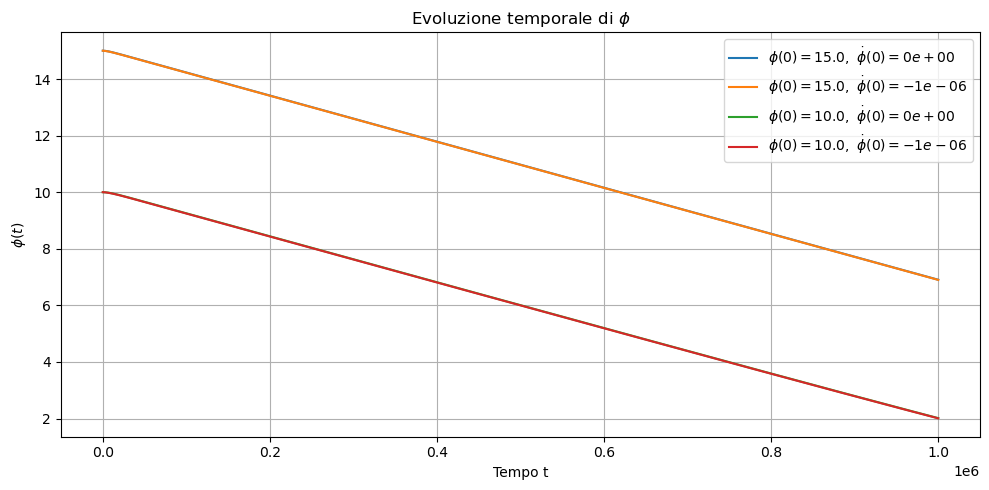

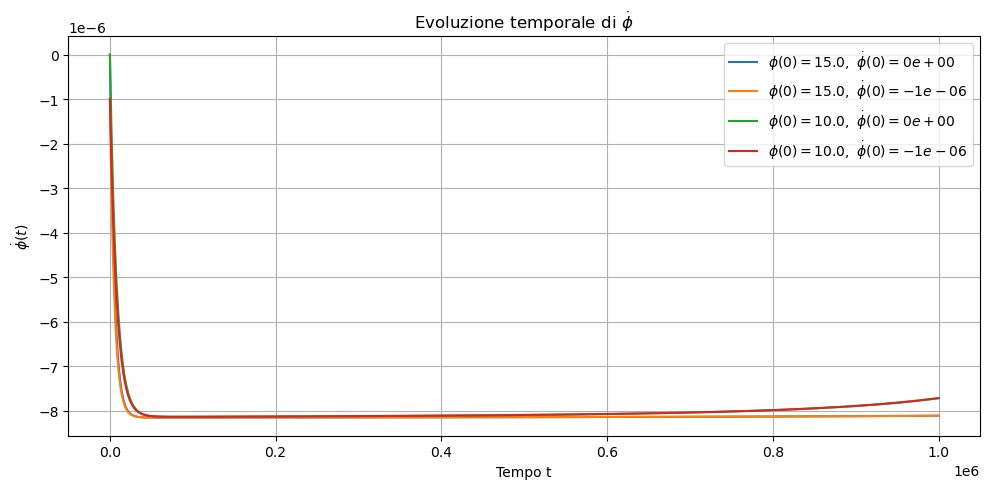

In [10]:
# Inizializziamo due figure separate per φ(t) e φ̇(t)
plt.figure(figsize=(10, 5))
# Loop sulle condizioni iniziali e risoluzione del sistema
for ic in initial_conditions:
    sol = solve_ivp(odes, t_span, ic, t_eval=t_eval, rtol=1e-8, atol=1e-10)
    # Plot per φ(t)
    plt.plot(sol.t, sol.y[0], label=rf"$\phi(0)={ic[0]}, \ \dot{{\phi}}(0)={ic[1]:.0e}$")
plt.xlabel("Tempo t")
plt.ylabel(r"$\phi(t)$")
plt.title("Evoluzione temporale di $\phi$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Adesso, un secondo grafico per φ̇(t)
plt.figure(figsize=(10, 5))
for ic in initial_conditions:
    sol = solve_ivp(odes, t_span, ic, t_eval=t_eval, rtol=1e-8, atol=1e-10)
    # Plot per φ̇(t)
    plt.plot(sol.t, sol.y[1], label=rf"$\phi(0)={ic[0]}, \ \dot{{\phi}}(0)={ic[1]:.0e}$")
plt.xlabel("Tempo t")
plt.ylabel(r"$\dot{\phi}(t)$")
plt.title("Evoluzione temporale di $\dot{\phi}$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()